## Exploratory Data Analysis

Look through the data to understand how to process it for the order flow imbalance analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = "/Users/ibringfaith/Documents/GitHub/cross-impact-analysis-of-order-flow-imbalance/data"
stock_files = [f"{path}/AAPL.csv", f"{path}/AMGN.csv", f"{path}/TSLA.csv", f"{path}/JPM.csv", f"{path}/XOM.csv"]
stocks_data = {file.split('/')[-1]: pd.read_csv(file) for file in stock_files}

In [10]:
for key in stocks_data.keys():
    print(key)

AAPL.csv
AMGN.csv
TSLA.csv
JPM.csv
XOM.csv


In [11]:
stocks_data["AAPL.csv"].head()

,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2024-11-04 09:00:00.038685808+00:00,10,2,38,A,N,0,224.48,448,130,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
1,2024-11-04 09:00:00.038977251+00:00,10,2,38,A,B,0,218.72,448,130,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
2,2024-11-04 09:00:00.048601601+00:00,10,2,38,A,B,1,217.00,100,128,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
3,2024-11-04 09:00:00.065865568+00:00,10,2,38,A,A,0,221.79,100,130,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
4,2024-11-04 09:00:00.066019928+00:00,10,2,38,A,A,0,221.69,100,130,...,0,0,0,NaN,NaN,0,0,0,0,AAPL


In [12]:
stocks_data["AAPL.csv"].columns

Index(['ts_event', 'rtype', 'publisher_id', 'instrument_id', 'action', 'side',
       'depth', 'price', 'size', 'flags', 'ts_in_delta', 'sequence',
       'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00', 'bid_ct_00',
       'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01',
       'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02', 'bid_sz_02',
       'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03', 'ask_px_03',
       'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03', 'bid_px_04',
       'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04', 'ask_ct_04',
       'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05', 'bid_ct_05',
       'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06',
       'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07', 'bid_sz_07',
       'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08', 'ask_px_08',
       'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08', 'bid_px_09',
       'ask_px_09', 'bid_sz_09', 'ask_sz_09', 'bid_ct_09', '

In [13]:
for stock, df in stocks_data.items():
    print(f"Summary for {stock}:")
    print(df.describe(), "\n")

Summary for AAPL.csv:
            rtype  publisher_id  instrument_id         depth         price  \
count  12281103.0    12281103.0     12281103.0  1.228110e+07  1.228110e+07   
mean         10.0           2.0           38.0  1.107077e+00  2.243549e+02   
std           0.0           0.0            0.0  1.820086e+00  2.098779e+00   
min          10.0           2.0           38.0  0.000000e+00  9.781000e+01   
25%          10.0           2.0           38.0  0.000000e+00  2.228300e+02   
50%          10.0           2.0           38.0  0.000000e+00  2.238400e+02   
75%          10.0           2.0           38.0  2.000000e+00  2.263800e+02   
max          10.0           2.0           38.0  9.000000e+00  3.000000e+02   

               size         flags   ts_in_delta      sequence     bid_px_00  \
count  1.228110e+07  1.228110e+07  1.228110e+07  1.228110e+07  1.228110e+07   
mean   7.815443e+01  1.261358e+02  1.676412e+05  3.264509e+08  2.243440e+02   
std    4.734704e+03  2.116135e+01  5.4

Price trends show a change after 11/09/2024

/Users/ibringfaith/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


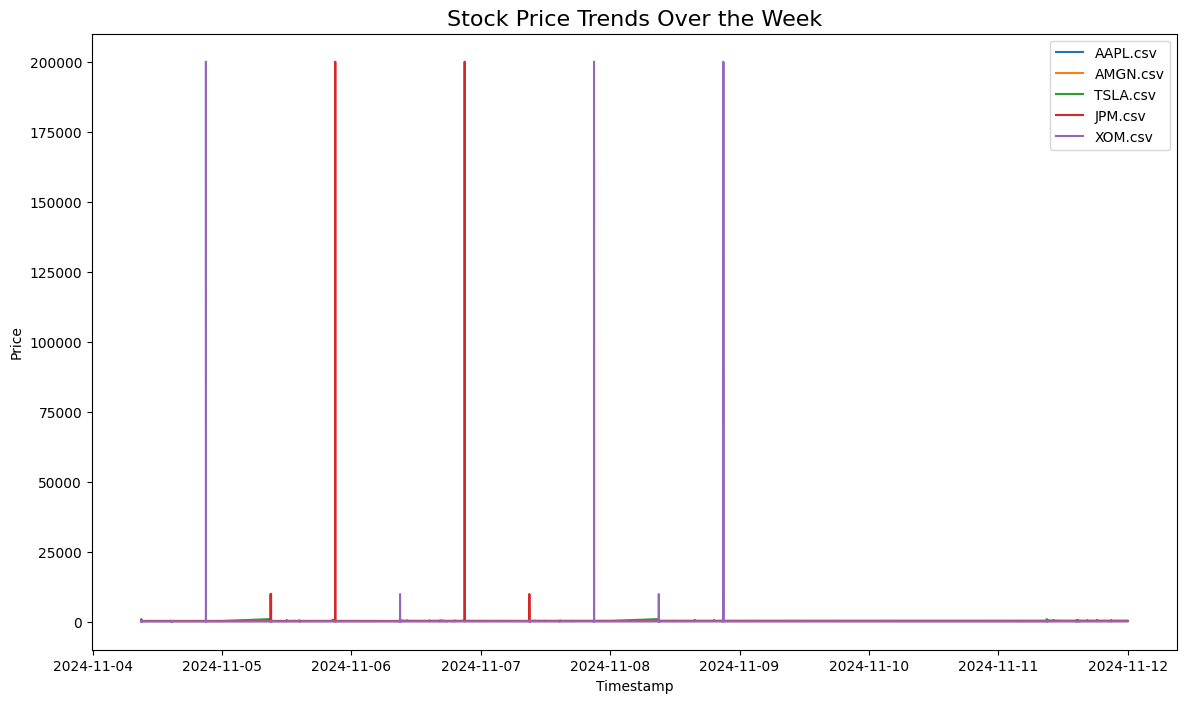

In [15]:
plt.figure(figsize=(14, 8))

for stock, df in stocks_data.items():
    plt.plot(pd.to_datetime(df["ts_event"]), df["price"], label=stock)

plt.title("Stock Price Trends Over the Week", fontsize=16)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.show()

Order quantity trend similar for each day (except 11/09/2024 and 11/10/2024)

/Users/ibringfaith/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


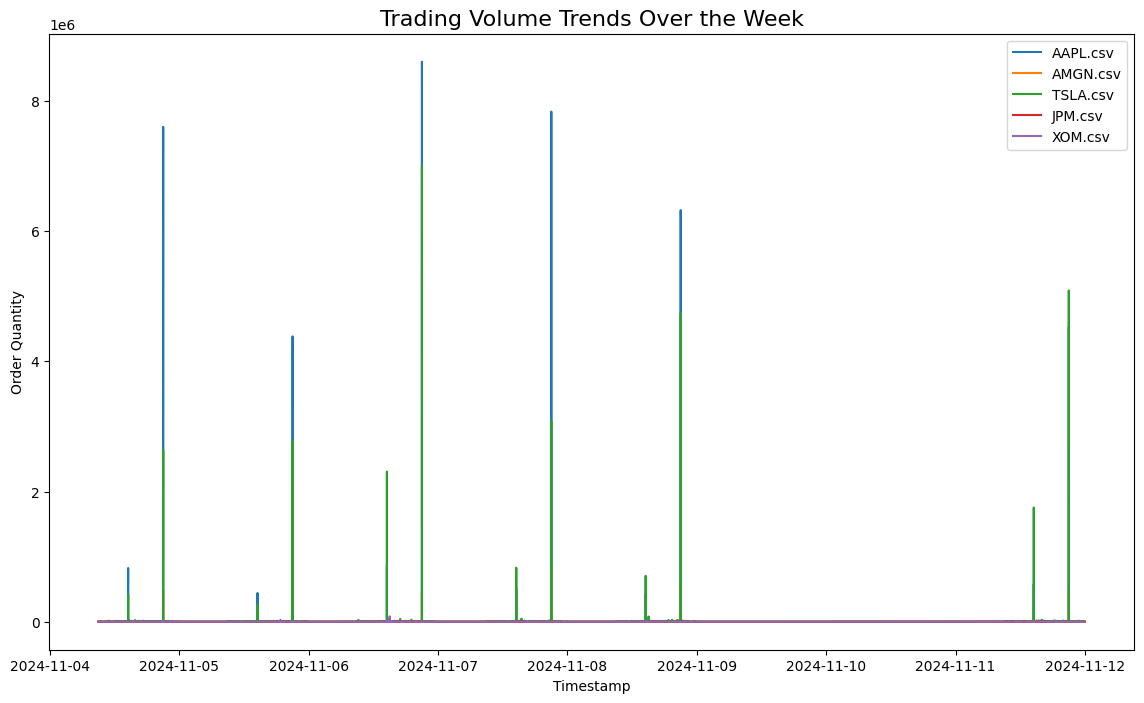

In [17]:
plt.figure(figsize=(14, 8))

for stock, df in stocks_data.items():
    plt.plot(pd.to_datetime(df["ts_event"]), df["size"], label=stock)

plt.title("Trading Volume Trends Over the Week", fontsize=16)
plt.xlabel("Timestamp")
plt.ylabel("Order Quantity")
plt.legend()
plt.show()

Trading activity for the week

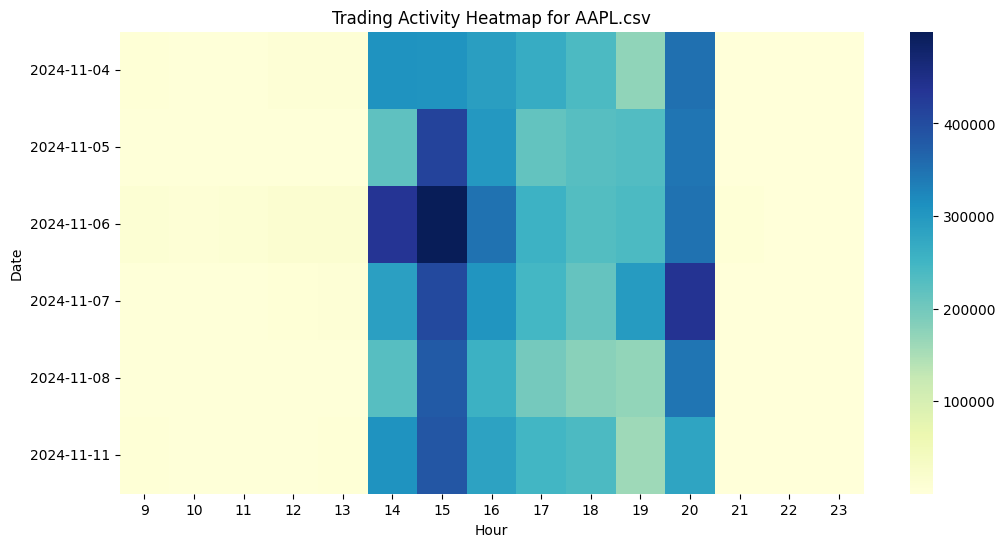

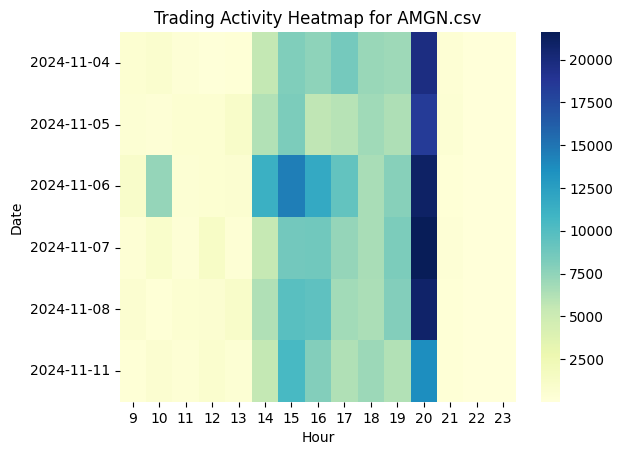

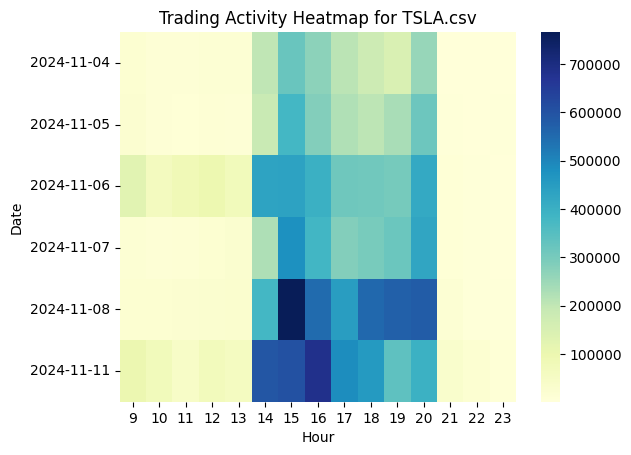

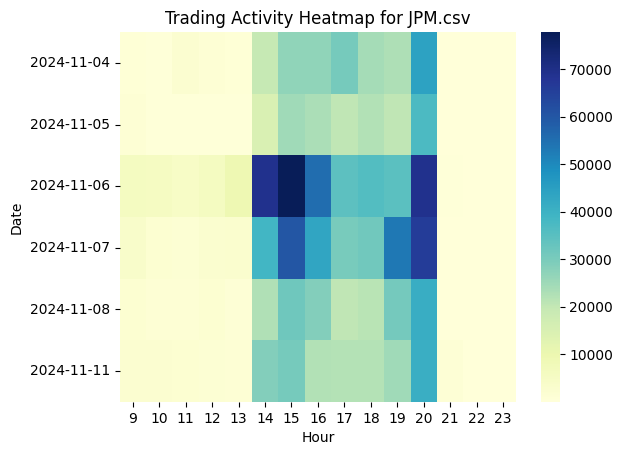

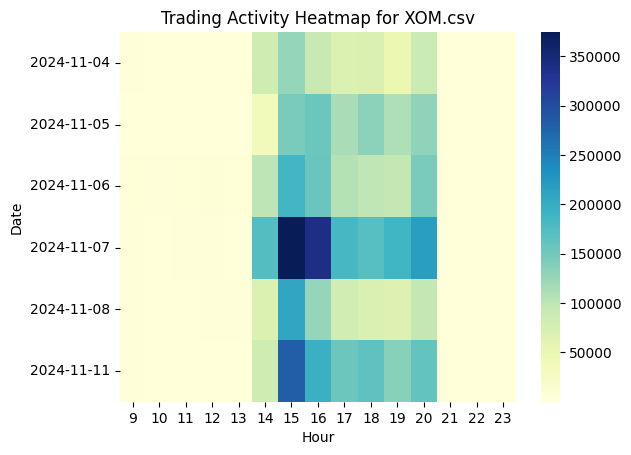

In [19]:
plt.figure(figsize=(12, 6))

for stock, df in stocks_data.items():
    df['hour'] = pd.to_datetime(df['ts_event']).dt.hour
    df['date'] = pd.to_datetime(df['ts_event']).dt.date
    heatmap_data = df.groupby(['date', 'hour']).size().unstack()

    sns.heatmap(heatmap_data, cmap="YlGnBu", cbar=True)
    plt.title(f"Trading Activity Heatmap for {stock}")
    plt.xlabel("Hour")
    plt.ylabel("Date")
    plt.show()

Stock prices are highly correlated to each other.

Correlation Matrix:
          AAPL.csv  AMGN.csv  TSLA.csv   JPM.csv   XOM.csv
AAPL.csv  1.000000  0.631162  0.461972  0.584119  0.698375
AMGN.csv  0.631162  1.000000  0.926465  0.665191  0.738015
TSLA.csv  0.461972  0.926465  1.000000  0.789347  0.803168
JPM.csv   0.584119  0.665191  0.789347  1.000000  0.985844
XOM.csv   0.698375  0.738015  0.803168  0.985844  1.000000


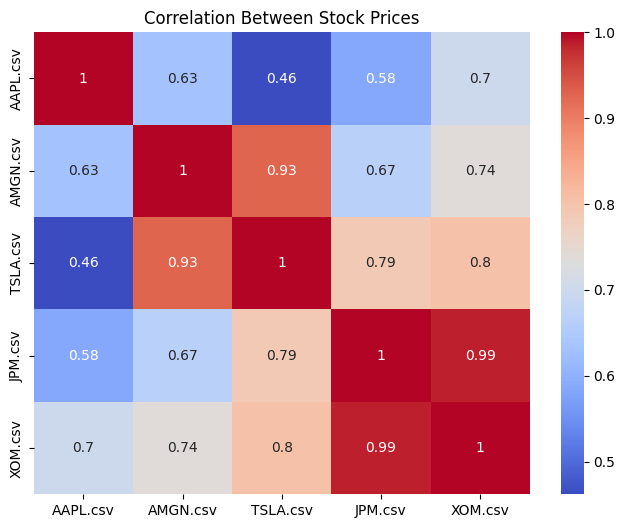

In [20]:
price_data = {stock: df.groupby('date')['price'].mean() for stock, df in stocks_data.items()}
price_df = pd.DataFrame(price_data)

correlation_matrix = price_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Between Stock Prices")
plt.show()